# 고양이 수염 스티커 만들기 프로젝트

## CASE 1

### 라이브러리 버전 확인

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [2]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


### STEP 1: 스티커 구하기 or 만들기

In [3]:
# 사용할 고양이 수염 이미지
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

### STEP 2: 얼굴 검출 & 랜드마크 만들기

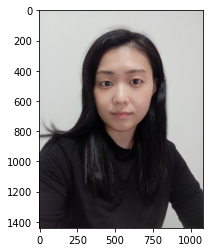

In [4]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/yejin.jpg' # 절대경로 사용하기
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_bgr_orig = img_bgr.copy() # 투명도 작업용 변수

img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # RGB 이미지로 변환, 안하면 bgr이라서 파랗게 나온다
plt.imshow(img_rgb)
plt.show() # 이미지 출력

In [5]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
# 숫자가 1이므로 원래 색상대로 이미지 읽기

rectangles[[(297, 348) (759, 811)]]


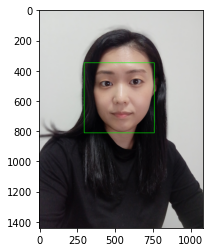

In [6]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []   # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)   # 모든 landmark의 위치정보를 points 변수에 저장
        
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))   # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        
    list_landmarks.append(list_points)   # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


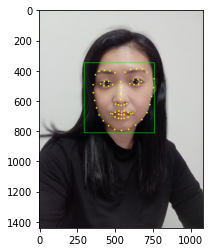

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 5이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)   # RGB 이미지로 전환
plt.imshow(img_show_rgb)   # 이미지를 준비
plt.show()   # 이미지를 출력

In [10]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.width() // 2  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 
    w = dlib_rect.width() 
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(541, 629)
(x,y) : (541,398)
(w,h) : (463,463)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'    # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path)    # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h))    # 스티커 이미지 조정
print (img_sticker.shape)    # 사이즈를 조정한 고양이 수염 이미지의 차원 확인
print ('(x,y) : (%d,%d)'%(x, y))

(463, 463, 3)
(x,y) : (541,398)


In [12]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 541
# y는 이미지에서 코 부위의 y값 = 398
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 463
# h는 얼굴 영역의 세로를 차지하는 픽셀의 수 = 463
refined_x = x - w // 2
refined_y = y
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문
# 즉, refined_x, refined_y값에서 고양이 수염 이미지가 시작됨
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생 : 이미지 범위를 벗어남

# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (310,398)


In [13]:
# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나온다
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (310,398)


In [14]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where의 parameter: img_sticker==255로 지정해서, 스티커가 잘 보이도록 하였다
print("슝~")

슝~


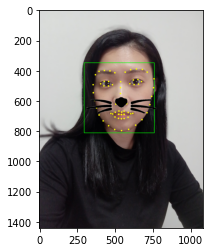

In [15]:
# 얼굴 영역 + 랜드마크 + 고양이 수염 이미지 덧붙인 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

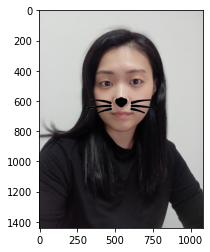

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### 반투명 스티커 만들기

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst

- src1: (입력) 첫 번째 사진
- alpha: 첫 번째 사진 가중치
- src2: 두 번째 사진. src1과 같은 크기 & 같은 타입
- beta: 두 번째 사진 가중치
- gamma: 결과 사진에 추가적으로 더할 값
- dst: 가중치 합 결과 영상
- dtype: 출력 사진(dst)의 타입

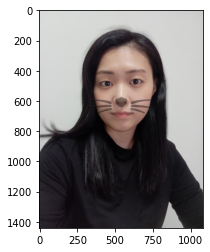

In [17]:
sticker_area = img_bgr_orig[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 다양한 원본이미지에 적용하기

## CASE 2

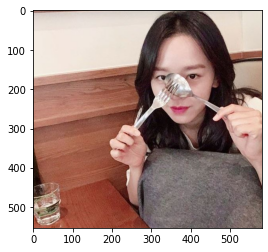

In [18]:
my_image_path2 = os.getenv('HOME') + '/aiffel/camera_sticker/images/hyesun.png'
img_bgr2 = cv2.imread(my_image_path2)    # OpenCV로 이미지를 불러오기
img_bgr2_orig = img_bgr2.copy() # 투명도 작업용 변수

img_show2 = img_bgr2.copy()      # 출력용 이미지를 따로 보관
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)    # RGB 이미지로 변환, 안하면 bgr이라서 파랗게 나온다
plt.imshow(img_rgb2)
plt.show() # 이미지 출력

In [19]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# 얼굴의 bounding box를 추출
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)

rectangles[[(283, 118) (469, 304)]]


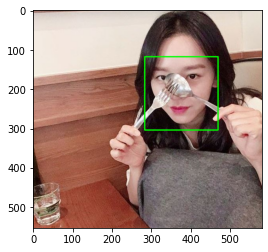

In [20]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb2 =  cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [21]:
list_landmarks = []   # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb2, dlib_rect)   # 모든 landmark의 위치정보를 points 변수에 저장
        
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))   # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        
    list_landmarks.append(list_points)   # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


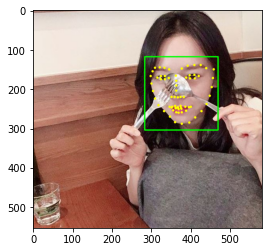

In [22]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show2, point, 3, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 3이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)   # RGB 이미지로 전환
plt.imshow(img_show_rgb2)   # 이미지를 준비
plt.show()   # 이미지를 출력

In [23]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.width() // 2  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 
    w = dlib_rect.width() 
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(367, 221)
(x,y) : (367,128)
(w,h) : (187,187)


In [24]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'    # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path)    # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h))    # 스티커 이미지 조정
print (img_sticker.shape)    # 사이즈를 조정한 고양이 수염 이미지의 차원 확인
print ('(x,y) : (%d,%d)'%(x, y))

(187, 187, 3)
(x,y) : (367,128)


In [25]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 541
# y는 이미지에서 코 부위의 y값 = 398
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 463
# h는 얼굴 영역의 세로를 차지하는 픽셀의 수 = 463
refined_x = x - w // 2
refined_y = y
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문
# 즉, refined_x, refined_y값에서 고양이 수염 이미지가 시작됨
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생 : 이미지 범위를 벗어남

# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (274,128)


In [26]:
# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나온다
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (274,128)


In [27]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where의 parameter: img_sticker==255로 지정해서, 스티커가 잘 보이도록 하였다
print("슝~")

슝~


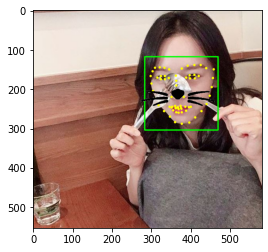

In [28]:
# 얼굴 영역 + 랜드마크 + 고양이 수염 이미지 덧붙인 이미지
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

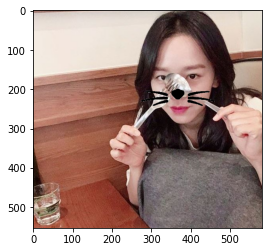

In [29]:
sticker_area = img_bgr2[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr2[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

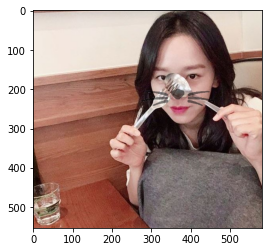

In [30]:
sticker_area = img_bgr2_orig[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

## CASE 3

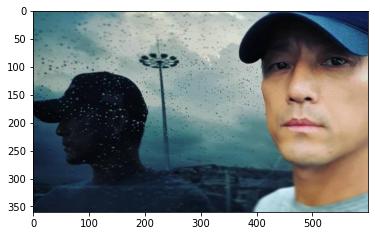

In [31]:
my_image_path3 = os.getenv('HOME') + '/aiffel/camera_sticker/images/jinhee.png'
img_bgr3 = cv2.imread(my_image_path3)    # OpenCV로 이미지를 불러오기
img_bgr3_orig = img_bgr3.copy() # 투명도 작업용 변수

img_show3 = img_bgr3.copy()      # 출력용 이미지를 따로 보관
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)    # RGB 이미지로 변환, 안하면 bgr이라서 파랗게 나온다
plt.imshow(img_rgb3)
plt.show() # 이미지 출력

In [32]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# 얼굴의 bounding box를 추출
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb3, 1)   # (image, num of image pyramid)

rectangles[]


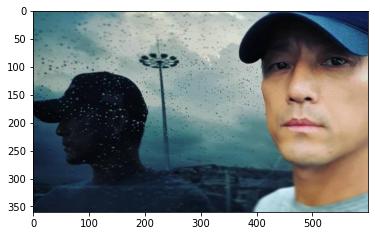

In [33]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb3 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb3)
plt.show()

## CASE 4

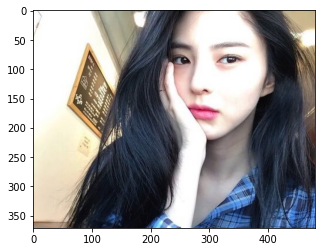

In [34]:
my_image_path4 = os.getenv('HOME') + '/aiffel/camera_sticker/images/sohee.png'
img_bgr4 = cv2.imread(my_image_path4)    # OpenCV로 이미지를 불러오기
img_bgr4_orig = img_bgr4.copy() # 투명도 작업용 변수

img_show4 = img_bgr4.copy()      # 출력용 이미지를 따로 보관
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)    # RGB 이미지로 변환, 안하면 bgr이라서 파랗게 나온다
plt.imshow(img_rgb4)
plt.show() # 이미지 출력

In [35]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# 얼굴의 bounding box를 추출
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb4, 1)   # (image, num of image pyramid)

rectangles[[(201, 15) (386, 201)]]


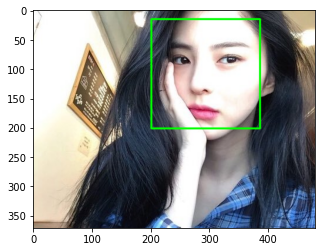

In [36]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show4, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb4 =  cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb4)
plt.show()

In [37]:
list_landmarks = []   # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb2, dlib_rect)   # 모든 landmark의 위치정보를 points 변수에 저장
        
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))   # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        
    list_landmarks.append(list_points)   # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


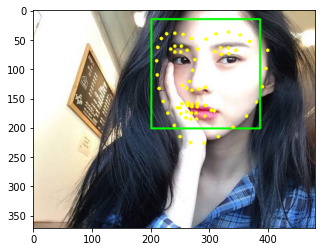

In [38]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show4, point, 3, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 3이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb4 = cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB)   # RGB 이미지로 전환
plt.imshow(img_show_rgb4)   # 이미지를 준비
plt.show()   # 이미지를 출력

In [39]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) 
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.width() // 2  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 
    w = dlib_rect.width() 
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(270, 136)
(x,y) : (270,43)
(w,h) : (186,186)


In [40]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'    # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path)    # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h))    # 스티커 이미지 조정
print (img_sticker.shape)    # 사이즈를 조정한 고양이 수염 이미지의 차원 확인
print ('(x,y) : (%d,%d)'%(x, y))

(186, 186, 3)
(x,y) : (270,43)


In [41]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 541
# y는 이미지에서 코 부위의 y값 = 398
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 463
# h는 얼굴 영역의 세로를 차지하는 픽셀의 수 = 463
refined_x = x - w // 2
refined_y = y
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문
# 즉, refined_x, refined_y값에서 고양이 수염 이미지가 시작됨
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생 : 이미지 범위를 벗어남

# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (177,43)


In [42]:
# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나온다
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (177,43)


In [43]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where의 parameter: img_sticker==255로 지정해서, 스티커가 잘 보이도록 하였다
print("슝~")

슝~


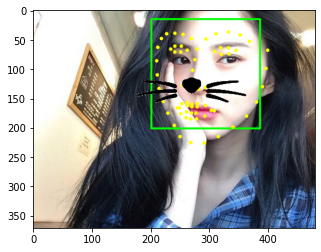

In [44]:
# 얼굴 영역 + 랜드마크 + 고양이 수염 이미지 덧붙인 이미지
plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.show()

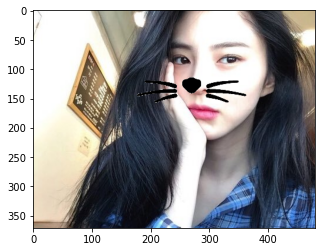

In [45]:
sticker_area = img_bgr4[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr4[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

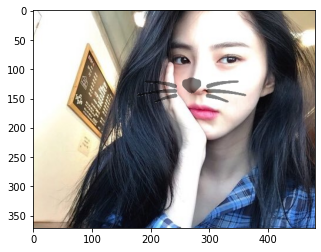

In [46]:
sticker_area = img_bgr4_orig[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr4[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB))
plt.show()

<회고> <br>
카메라 스티커앱 만들기를 도전해보았다. <br>
나왔던 개념들.

[사진 불러와서 얼굴 인식, 랜드마크 찍기]
- OpenCV: 대표적인 컴퓨터 비전 라이브러리
- dlib을 통해 얼굴 검출: detector는 HOG, SVM을 통해 얼굴을 찾는다
- 랜드마크: Dlib은 ibug 300-w로 학습한 모델 제공: 점의 개수 데이터 셋 68개 사용

[스티커 사진 불러와서 얼굴 사진에 붙이기]
- 이미지 크기 조정(resize): 얼굴 사진에 맞게
- 중심점에 맞춰 이미지 좌표 조정

[불투명 스티커 만들기]
- cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) 속성 조정

<br>
[실행결과] <br>
1. CASE 1: 일반적인 정면 사진<br>
- 얼굴 박스 인식, 랜드마크, 스티커 붙이기 까지 잘 진행됨<br>
- 노드의 왕관 예시와는 다르게 고양이 수염 스티커는 위치가 중간쯤 위치하기 때문에 refined_y의 값을 y-h가 아닌 y로 맞춰주었다.
<br><br>
2. CASE 2: 얼굴의 일부가 가려진 사진<br>
- 포크와 수저로 코와 볼 약간이 가려져 있음<br>
- 얼굴 인식하고, 랜드마크, 스티커 붙이는 것까지 큰 문제 없이 진행됨
<br><br>
3. CASE 3: 얼굴의 일부가 프레임 밖을 벗어난 사진<br>
- 얼굴 박스 사각형부터 인식 안됨
<br><br>
4. CASE 4: 얼굴의 밝기가 강하고 얼굴을 옆으로 약간 돌린 사진<br>
- 대체적으로 잘 인식했으나 랜드마크와 스티커가 완전히 정확하게는 맞지 않음
<br><br>
>> 케이스에 따라 얼굴 인식(+랜드마크)과 스티커 붙이기가 달라지는 것을 알 수 있었다<br>
>> 결과가 차이나는 원인은 더 자세히 살펴볼 필요가 있다